In [71]:
import geopandas as gpd
import pandas as pd
mainGitHub = 'https://raw.githubusercontent.com/meade68/DACSS_690D_Week09_HW2/main/'
BG = mainGitHub + "DATA/tl_2025_25_tabblock20.zip"
CRIMES= mainGitHub+ "DATA/Police_Data__Crime_Reports_20251101.csv"
# Correct: use BG directly (no double prefix)

census_BG = gpd.read_file(f"{BG}")
crime_BG= pd.read_csv(f"{CRIMES}")

print(census_BG.head())
print(crime_BG.head())

  STATEFP20 COUNTYFP20 TRACTCE20 BLOCKCE20          GEOID20  \
0        25        005    640800      2016  250056408002016   
1        25        001    011802      1006  250010118021006   
2        25        005    610204      3009  250056102043009   
3        25        023    501101      3013  250235011013013   
4        25        023    541100      1024  250235411001024   

                  GEOIDFQ20      NAME20 MTFCC20 UR20 UACE20 FUNCSTAT20  \
0  1000000US250056408002016  Block 2016   G5040    U  72505          S   
1  1000000US250010118021006  Block 1006   G5040    U  05167          S   
2  1000000US250056102043009  Block 3009   G5040    U  72505          S   
3  1000000US250235011013013  Block 3013   G5040    U  09271          S   
4  1000000US250235411001024  Block 1024   G5040    R   None          S   

   ALAND20  AWATER20   INTPTLAT20    INTPTLON20  HOUSING20  POP20  \
0    18123         0  +41.6851722  -071.1478465         30     72   
1    14480         0  +41.7102851  -07

In [76]:

# Merge geodataframe and dataframe
census_BG = census_BG.dropna(subset=['GEOID20'])
crime_BG = crime_BG.dropna(subset=['Block Code'])

#filter any blocks where not middlesex county
census_BG = census_BG[census_BG['COUNTYFP20']=='017']

# Convert to numeric while handling errors
census_BG['GEOID20'] = pd.to_numeric(census_BG['GEOID20'], errors='coerce')
crime_BG['Block Code'] = pd.to_numeric(crime_BG['Block Code'], errors='coerce')

# Drop any rows where conversion resulted in NaN
census_BG = census_BG.dropna(subset=['GEOID20'])
crime_BG = crime_BG.dropna(subset=['Block Code'])

# Now merge the dataframes
census_BG_crime_BG = census_BG.merge(crime_BG, left_on="GEOID20", right_on="Block Code", how="inner")


<Axes: >

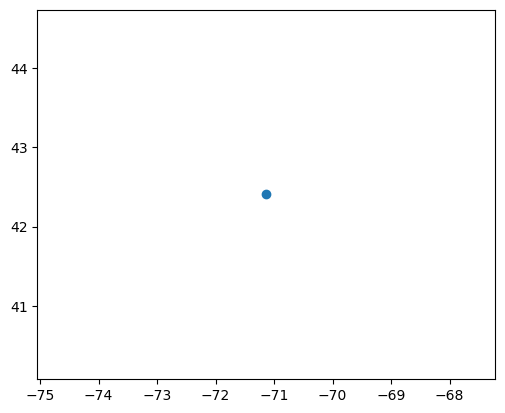

In [77]:
#nabbed the code from my instructor!
from geopy.geocoders import Nominatim
from shapely.geometry import Point

old_address='26 Garrison Ave, Somerville, MA 02144'

geolocator = Nominatim(user_agent="theGeocoder")

apt_Address = geolocator.geocode(old_address)

apt_old_gdf = gpd.GeoDataFrame(
    {'address': [apt_Address.address]},
    geometry=[Point(apt_Address.longitude, apt_Address.latitude)],
    crs="EPSG:4326" # because of lon/lat
)

# reprojecting
apt_old_gdf = apt_old_gdf.to_crs(census_BG_crime_BG.crs)

# here it is
apt_old_gdf.plot()